In [ ]:
# Linear Regression Project - Solutions
# Lupin prediction 

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [10]:

Data= pd.read_csv("Lupin16012021.csv")

In [12]:

Data

,Date,Open Price,High Price,Low Price,Close Price,WAP,No.of Shares,No. of Trades,Total Turnover (Rs.),Deliverable Quantity,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open
0,15-January-2021,1111.00,1112.60,1077.85,1093.15,1093.642550,105942,4995,115862679.0,15544.0,14.67,34.75,-17.85
1,14-January-2021,1065.00,1113.55,1062.55,1105.70,1091.891335,222169,8239,242584406.0,70262.0,31.63,51.00,40.70
2,13-January-2021,1080.10,1088.95,1047.05,1067.55,1071.698203,99080,3803,106183858.0,13198.0,13.32,41.90,-12.55
3,12-January-2021,1076.85,1084.20,1055.10,1059.75,1067.005975,125360,4918,133759869.0,28054.0,22.38,29.10,-17.10
4,11-January-2021,1040.00,1081.20,1040.00,1075.60,1066.296732,170103,6316,181380273.0,36854.0,21.67,41.20,35.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2484,7-January-2011,490.00,491.40,470.00,473.90,481.457875,102897,3255,49540571.0,48055.0,46.70,21.40,-16.10
2485,6-January-2011,491.50,495.00,487.00,489.00,489.519605,59374,1739,29064737.0,21820.0,36.75,8.00,-2.50
2486,5-January-2011,490.00,493.30,483.90,486.55,489.476921,93332,2800,45683860.0,22001.0,23.57,9.40,-3.45
2487,4-January-2011,490.00,493.80,487.10,489.05,490.780290,153566,2556,75367166.0,83539.0,54.40,6.70,-0.95


In [13]:

Data.describe()

,Open Price,High Price,Low Price,Close Price,WAP,No.of Shares,No. of Trades,Total Turnover (Rs.),Deliverable Quantity,% Deli. Qty to Traded Qty,Spread High-Low,Spread Close-Open
count,2489.000000,2489.000000,2489.000000,2489.000000,2489.000000,2.489000e+03,2489.000000,2.489000e+03,2.488000e+03,2488.000000,2489.000000,2489.000000
mean,991.659863,1003.533849,976.862013,988.962214,990.237693,1.139006e+05,3846.019285,1.162967e+08,4.096310e+04,30.533758,26.671836,-2.697650
std,430.979314,435.353846,424.534243,429.417877,429.604119,2.447690e+05,4354.268462,3.901998e+08,2.144720e+05,15.318540,19.455380,19.447008
min,380.050000,387.000000,363.000000,374.600000,375.730096,8.360000e+02,39.000000,4.513160e+05,7.050000e+02,2.960000,2.600000,-180.600000
25%,705.500000,711.800000,698.000000,703.450000,703.634274,4.548000e+04,1843.000000,3.866810e+07,1.142025e+04,20.445000,14.350000,-11.000000
50%,875.100000,886.200000,862.500000,872.100000,874.735991,7.056800e+04,2909.000000,6.888132e+07,1.847300e+04,27.680000,21.500000,-1.900000
75%,1377.350000,1391.650000,1354.050000,1371.250000,1375.563432,1.213640e+05,4416.000000,1.204720e+08,3.411075e+04,36.122500,32.000000,6.600000
max,2115.000000,2127.000000,2077.000000,2107.050000,2098.609664,9.820874e+06,106238.000000,1.782952e+10,9.762648e+06,99.410000,226.650000,141.450000


In [15]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2489 entries, 0 to 2488
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       2489 non-null   object 
 1   Open Price                 2489 non-null   float64
 2   High Price                 2489 non-null   float64
 3   Low Price                  2489 non-null   float64
 4   Close Price                2489 non-null   float64
 5   WAP                        2489 non-null   float64
 6   No.of Shares               2489 non-null   int64  
 7   No. of Trades              2489 non-null   int64  
 8   Total Turnover (Rs.)       2489 non-null   float64
 9   Deliverable Quantity       2488 non-null   float64
 10  % Deli. Qty to Traded Qty  2488 non-null   float64
 11  Spread High-Low            2489 non-null   float64
 12  Spread Close-Open          2489 non-null   float64
dtypes: float64(10), int64(2), object(1)
memory usage

In [17]:
# Exploratory Data Analysis
#Use seaborn to create a jointplot to compare the Time on Website and Yearly Amount Spent columns.
#Does the correlation make sense?
sns.set_palette("GnBu_d")
sns.set_style('whitegrid')


<AxesSubplot:>

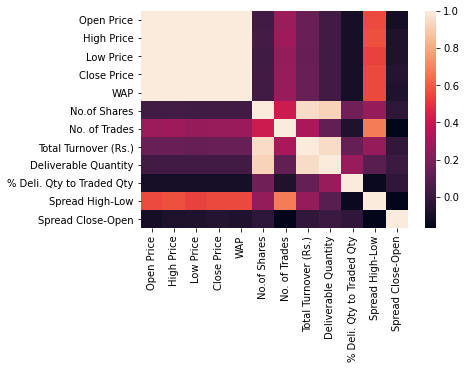

In [16]:
sns.heatmap(Data.corr())

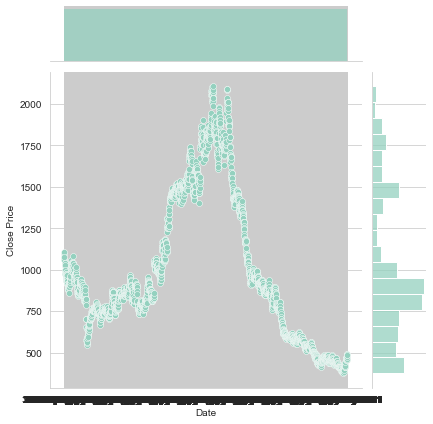

In [18]:
# Closing price depends upon the date.
sns.jointplot(x='Date',y='Close Price',data=Data)

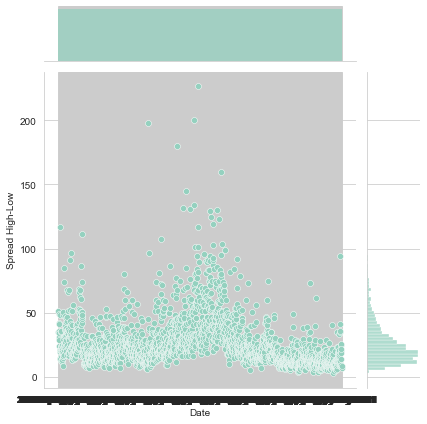

In [45]:
sns.jointplot(x='Date',y='Spread High-Low',data=Data)

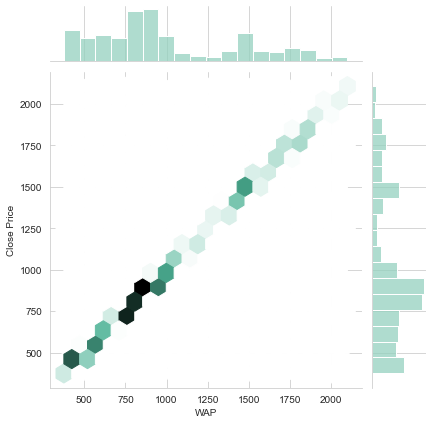

In [19]:
#Use jointplot to create a 2D hex bin plot comparing Time on App and Length of Membership.


sns.jointplot(x='WAP',y='Close Price',kind='hex',data=Data)

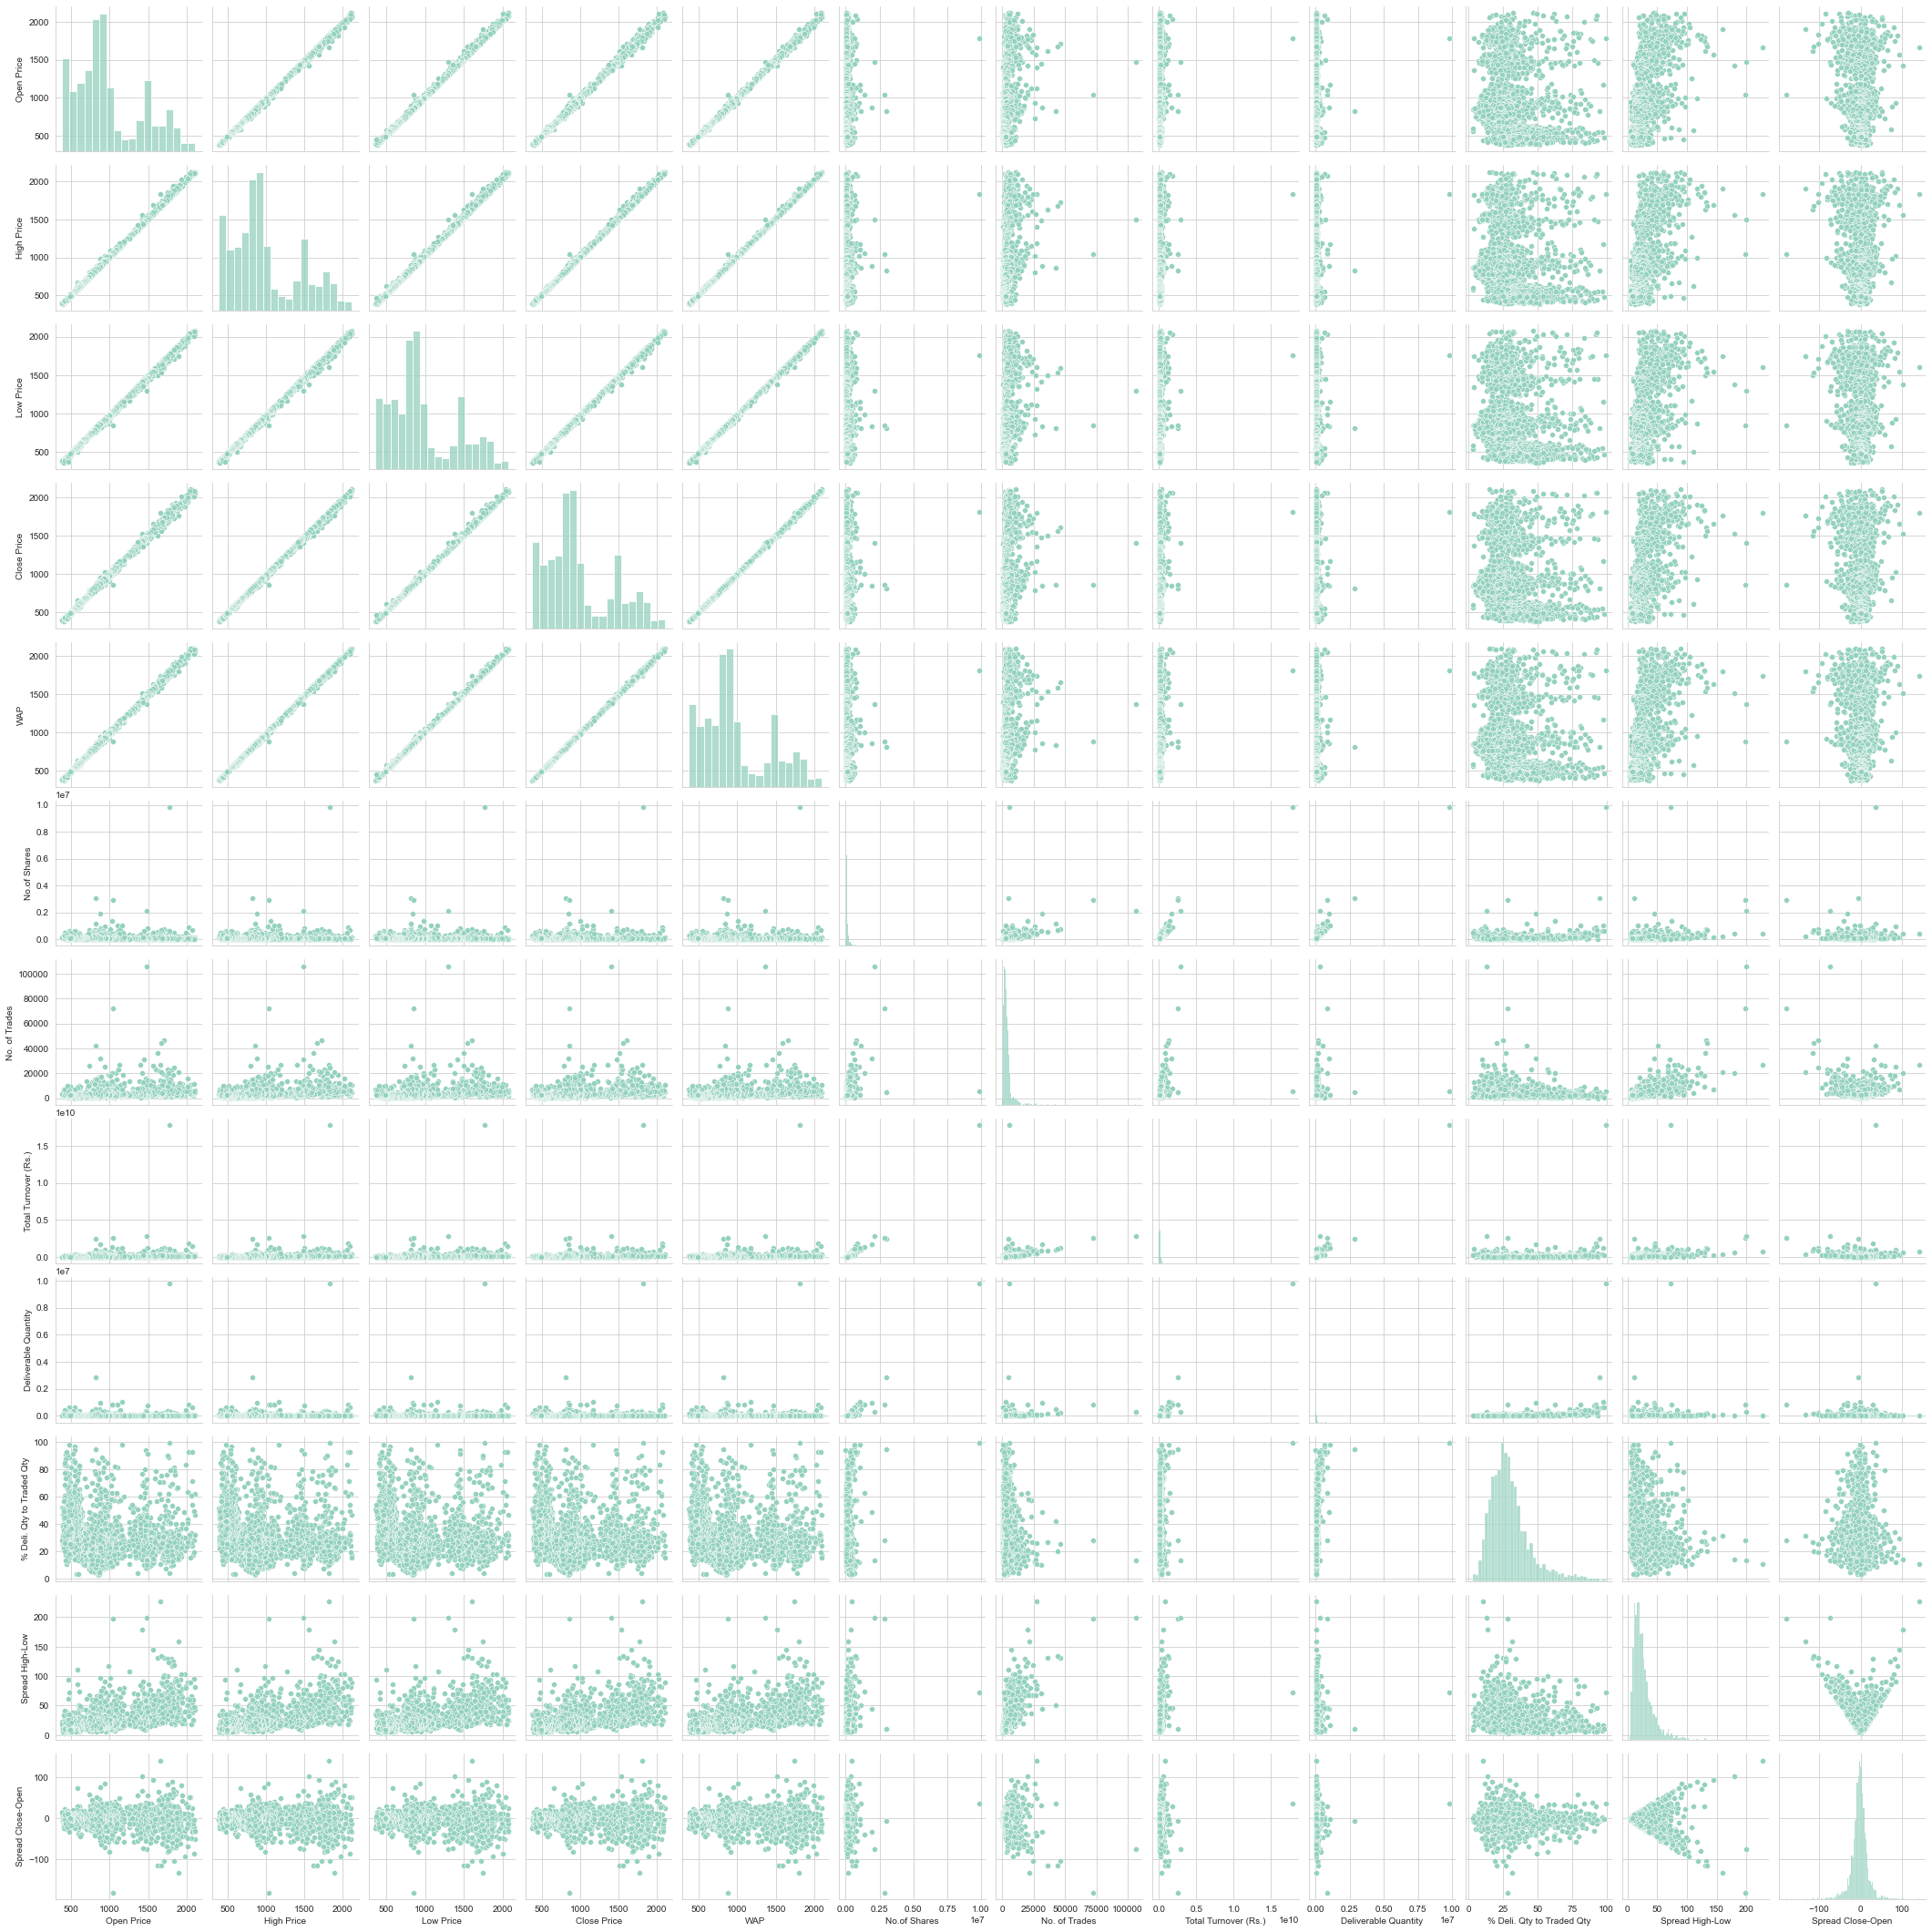

In [49]:
#Let's explore these types of relationships across the entire data set. 
#Use pairplot to recreate the plot below.(Don't worry about the the colors)


sns.pairplot(Data)

In [ ]:
#Based off this plot what looks to be the most correlated feature with Closing price?


# OpenPrice, LowPrice, HighPrice, WAP are correlated to ClosingPices 

In [2]:
#Create a linear model plot (using seaborn's lmplot) of ClosingPrice vs. OpenPrice.
sns.lmplot(x='Open',y='Close',data=Data)

NameError: name 'sns' is not defined

In [51]:
# Training and Testing Data
#Now that we've explored the data a bit, let's go ahead and split the data into training and testing sets.
#Set a variable X equal to the 
#numerical features of the WAP and a variable y equal to the "ClosePrice" column.


In [3]:
y = Data['Close']

NameError: name 'Data' is not defined

In [4]:

X = Data[['Open', 'High','Low']]

NameError: name 'Data' is not defined

In [54]:
#Use model_selection.train_test_split from sklearn to split the 
#data into training and testing sets. Set test_size=0.3 and random_state=101


In [70]:
from sklearn.model_selection import train_test_split

In [71]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [72]:
# Training the Model
#Now its time to train our model on our training data!

#Import LinearRegression from sklearn.linear_model


In [73]:

from sklearn.linear_model import LinearRegression

In [74]:
#Create an instance of a LinearRegression() model named lm.


lm = LinearRegression()

In [75]:
#Train/fit lm on the training data.
lm.fit(X_train,y_train)

LinearRegression()

In [76]:
#Print out the coefficients of the model


# The coefficients
print('Coefficients: \n', lm.coef_)

Coefficients: 
 [-0.58069653  0.84795454  0.73109836]


In [78]:
#Predicting Test Data¶
#Now that we have fit our model, let's evaluate its performance by predicting off the test values!

#Use lm.predict() to predict off the X_test set of the data.
predictions = lm.predict( X_test)

Text(0, 0.5, 'Predicted Y')

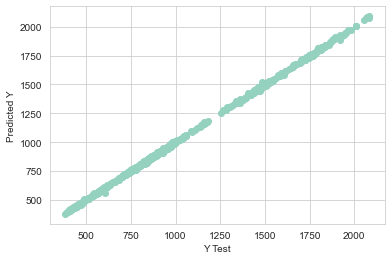

In [79]:
#Create a scatterplot of the real test values versus the predicted values.


plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

In [80]:
#Evaluating the Model
#Let's evaluate our model performance by calculating the residual sum of squares and the explained variance score (R^2).

#Calculate the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error. Refer to the lecture or to Wikipedia for the formulas


# calculate these metrics by hand!
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 4.860999056747691
MSE: 49.014343684810825
RMSE: 7.001024473947425


C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


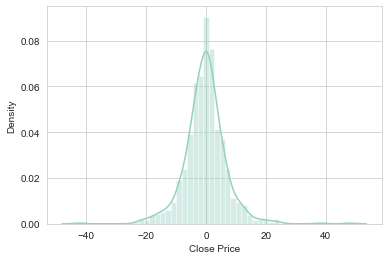

In [81]:
#Residuals
#You should have gotten a very good model with a good fit. Let's quickly explore the residuals to make 
#sure everything was okay with our data.

#Plot a histogram of the residuals and make sure it looks normally distributed. Use either seaborn distplot,
#or just plt.hist().
sns.distplot((y_test-predictions),bins=50);

In [82]:
#Conclusion
#We still want to figure out the answer to the original question, 
#do we focus our efforst on mobile app or website development? 
#Or maybe that doesn't even really matter, and Membership Time is what is really important. 
#Let's see if we can interpret the coefficients at all to get an idea.

#Recreate the dataframe below.


coeffecients = pd.DataFrame(lm.coef_,X.columns)
coeffecients.columns = ['Coeffecient']
coeffecients

,Coeffecient
Open Price,-0.580697
High Price,0.847955
Low Price,0.731098
